In [ ]:
#!pip install pandas

In [ ]:
# # Install contractions for expanding contractions in text e.g I'm to I am
# !pip install contractions

# # Install vader sentiment package for sentiment analysis
# !pip install vaderSentiment

# # Install textblob package for text processing and sentiment analysis
# !pip install textblob

# # Install WordCloud package for creating word cloud visualizations
# !pip install wordcloud

# # Install Contractions package for expanding contractions in text
# !pip install contractions

# # Install seaborn for data visualization
# !pip install seaborn

# # Install nltk for natural language processing tasks
# import nltk
# nltk.download("all")  # Download all NLTK data
# nltk.download("omw-1.4")  # Download WordNet data
# nltk.download('vader_Lexicon')  # Download VADER Lexicon for sentiment analysis

# # Install scikit-learn for machine learning algorithms and tools
# !pip install scikit-learn

In [1]:
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)
# Help to extract the data using regular exprression
import re
#help to remove punctuation
import string
#importing the NLTK Library
import nltk
# Download the Open Multilingual WordNet data, which provides multilingual WordNet data.
nltk.download("omw-1.4")
from nltk.corpus import stopwords
#helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#used in stemming
from nltk.stem.porter import PorterStemmer
#used in lemmatization
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #for TF-IDf
# to create train , test data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('max_colwidth',None)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
data = pd.read_csv("sentiment analysis data.csv")

#### Loading the dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# data = pd.read_csv("/content/drive/MyDrive/sentiment analysis data.csv")

In [3]:
df= data.copy()

In [4]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sent_count
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,188
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,77
2,3,1,A series,2,8
3,5,1,series,2,6
4,6,1,of escapades demonstrating the adage that what is good for the goose,2,68


In [5]:
df['SentenceId'].nunique()

8529

In [6]:
df=df.loc[:,["Phrase", "Sentiment"]]

In [7]:
df['Sentiment'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [8]:
df.shape

(156015, 2)

In [9]:
#checking for null values
df.isna().sum()

Phrase       0
Sentiment    0
dtype: int64

In [10]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156015 entries, 0 to 156014
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Phrase     156015 non-null  object
 1   Sentiment  156015 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [11]:
negative_reviews = df[df['Sentiment'] == 0]
words = ' '.join(negative_reviews['Phrase'])
cleaned_word = " ".join([word for word in words.split()])


In [12]:
# Check the labels

data["Sentiment"].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [13]:
df['Sentiment'].value_counts()

Sentiment
2    79539
3    32927
1    27271
4     9206
0     7072
Name: count, dtype: int64

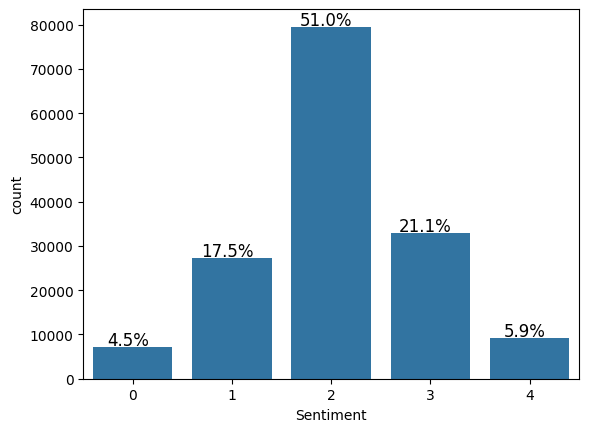

In [14]:
import seaborn as sns
# Plot the distribution of the class label
def bar_plot(data, feature):
    # Creating the countplot
    plot = sns.countplot(x = feature, data = data)

    # Finding the length the whole data
    total = len(data)

    # Creating the percentages to each label in the data
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points")
    #plt.show()

bar_plot(df,'Sentiment')

- the two main classes are slightly balance; hence, there is no need for balancing

- Let's select only the positive and negative classes for this project

In [15]:
new_data = df[(df["Sentiment"] == 0) | (df["Sentiment"] == 4)].copy()

# Map sentiment values to binary labels using .loc to avoid the SettingWithCopyWarning
new_data.loc[:, "Sentiment"] = new_data["Sentiment"].map({0: 0, 4: 1})

# Check the first few rows of the new DataFrame
print(new_data.head())

                                                                        Phrase  \
60  This quiet , introspective and entertaining independent is worth seeking .   
63                          quiet , introspective and entertaining independent   
71                                                                entertaining   
74                                                            is worth seeking   
97                             would have a hard time sitting through this one   

    Sentiment  
60          1  
63          1  
71          1  
74          1  
97          0  


In [16]:
new_data.shape

(16278, 2)

In [17]:
new_data.reset_index(drop = True, inplace = True)


### Test Pre-processing
- Cleaning
- Tokenization (Text segmentation)
- Vectorization


### Text Cleaning

In [18]:
# Removal of Special characters
import re

def remove_special_chars(text):
    text = re.sub('[^a-zA-Z]',' ',text)  # Replace all non-alphabetic characters with a space
    return text

# Apply the remove_special_chars function to the "Phrase" column using lambda
new_data["Phrase"] = new_data["Phrase"].apply(lambda x: remove_special_chars(x))
new_data.head(2)

,Phrase,Sentiment
0,This quiet introspective and entertaining independent is worth seeking,1
1,quiet introspective and entertaining independent,1


In [ ]:
# 2. Removal of contractions
#!pip install contractions

In [19]:
import contractions

def remove_contractions(text):
    expanded_text = [contractions.fix(word) for word in text.split()]
    text = ' '.join(expanded_text)
    return text


new_data.loc[:, "Phrase"] = new_data["Phrase"].apply(remove_contractions)

# Check the first 2 rows of the DataFrame to verify changes
new_data.head(2)

,Phrase,Sentiment
0,This quiet introspective and entertaining independent is worth seeking,1
1,quiet introspective and entertaining independent,1


In [20]:
# 3. Tokenization

import os
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk import word_tokenize

new_data["Phrase"] = new_data.apply(lambda row: word_tokenize(row["Phrase"]), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Check the first few rows of the DataFrame to verify changes
new_data.head(4)

,Phrase,Sentiment
0,"[This, quiet, introspective, and, entertaining, independent, is, worth, seeking]",1
1,"[quiet, introspective, and, entertaining, independent]",1
2,[entertaining],1
3,"[is, worth, seeking]",1


In [22]:
# 4. Lowercasing
def to_lowercase(words):
    word = [word.lower() for word in words]
    return word

new_data["Phrase"] = new_data["Phrase"].apply(lambda x: to_lowercase(x))
new_data.head(4)

,Phrase,Sentiment
0,"[this, quiet, introspective, and, entertaining, independent, is, worth, seeking]",1
1,"[quiet, introspective, and, entertaining, independent]",1
2,[entertaining],1
3,"[is, worth, seeking]",1


In [23]:
# 5. Removal of Stopwords

from nltk.corpus import stopwords
stop_words= stopwords.words("english")
def remove_stopwords(words):
    word = [word for word in words if word not in stop_words]
    return word

# Apply the function
new_data["Phrase"] = new_data["Phrase"].apply(lambda x: remove_stopwords(x))

new_data.head(4)

,Phrase,Sentiment
0,"[quiet, introspective, entertaining, independent, worth, seeking]",1
1,"[quiet, introspective, entertaining, independent]",1
2,[entertaining],1
3,"[worth, seeking]",1


In [24]:
# 6. Lemmatization

nltk.download("wordnet")
# using lemmatization
lm= WordNetLemmatizer()
def lemmatize_words(words):
    word=[lm.lemmatize(word) for word in words]
    return word

new_data["Phrase"] = new_data["Phrase"].apply(lambda x: lemmatize_words(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
new_data.head(4)

,Phrase,Sentiment
0,"[quiet, introspective, entertaining, independent, worth, seeking]",1
1,"[quiet, introspective, entertaining, independent]",1
2,[entertaining],1
3,"[worth, seeking]",1


## Putting all together

In [26]:
def join_words(row):
    words = " ".join([word for word in row])
    return words
new_data["Phrase"] = new_data["Phrase"].apply(lambda x: join_words(x))


In [27]:
new_data.head(3)

,Phrase,Sentiment
0,quiet introspective entertaining independent worth seeking,1
1,quiet introspective entertaining independent,1
2,entertaining,1


In [ ]:
# #new_data.to_csv("clean_data.csv", index=False) 
# #loading the data
# data=pd.read_csv("clean_data.csv")

In [ ]:
#new data as one empty string
#the empty string on new data was coonverted to a missing value while saving the data hence it has to be droppped

In [ ]:
# data=data.dropna()

# Model Deployment

- Classical Machine Learning; e.g Random Forest
- Deep Learning: e.g.LSTM , BERT

## Deploying the NLP model using Random Forest
- Here we can either use Bag of Word, TD-IDF or GloVe as our vectorizer

In [28]:
# Using Bag of words

from sklearn.feature_extraction.text import CountVectorizer

#Keep only 500 features as number of features will increase the processing time.
count_vector = CountVectorizer(max_features=500)
text_data = count_vector.fit_transform(new_data["Phrase"])

#Convert the data features to array
text_data= text_data.toarray()

In [29]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment,Sent_count
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,188
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,77
2,3,1,A series,2,8
3,5,1,series,2,6
4,6,1,of escapades demonstrating the adage that what is good for the goose,2,68


In [30]:
# Select the features and target
X = text_data
y = new_data["Sentiment"]

In [31]:
# Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [32]:
# training the model
Random_forest = RandomForestClassifier(random_state = 0)

# train the model
Random_forest.fit(X_train, y_train)

# make predictions on the test data
y_pred = Random_forest.predict(X_test)

#####  Model Evaluation

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1424
           1       0.92      0.85      0.88      1832

    accuracy                           0.87      3256
   macro avg       0.87      0.88      0.87      3256
weighted avg       0.88      0.87      0.87      3256



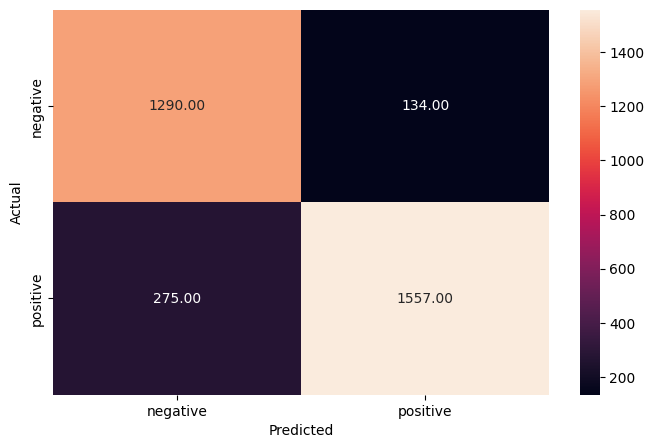

In [33]:
# defining a function to check model performance
# Function to print the classification report and get confusion matrix in a proper format

import matplotlib.pyplot as plt

def classification_evaluation(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative', 'positive'], yticklabels = ['negative', 'positive'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


# check metrics
classification_evaluation(y_test, y_pred)

- 1290 negative sentiments were correctly predicted as negative sentiments
- 1557 positive sentiments were correctly predicted
- 124 negative sentiments were wrongly predicted as positive sentiments
- 279 positive sentiments were wrongly predicted as negative sentiments

- Other sophisticated classical machine learning models such as XGBoost, could be investigated in future studies.

# Deep Learning

## Sequential LSTM Model

In [ ]:
#!pip install tensorflow

In [34]:
from sklearn.model_selection import train_test_split #imports traintest split function to split the dataset
import tensorflow as tf#imported framework for deep learning training
from tensorflow.keras import layers, models #provides interface for building and training a model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score#imports classification metrics
from sklearn.metrics import confusion_matrix , classification_report #to evaluate performance of the classification problem
from keras.models import Sequential#Allows you to build your model step by step
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout#support various in the model development
import seaborn as sns#seaborn libray for visualization plots like line graphs , charts etc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model#Allowsyou to create model using functional API
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.text import pad_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

### Tokenizing and converting the reviews to numerical vectors

In [35]:
tokenizer = Tokenizer(num_words = 700, split = ' ') #creating  vocbulary with 700words unique words
tokenizer.fit_on_texts(new_data["Phrase"].values)
X = tokenizer.texts_to_sequences(new_data["Phrase"].values) #converting text to sequence-sequences of integers,rep index of each
#word in the original text
X = pad_sequences(X, 100)

In [36]:
import pickle
with open("tokenizer.pkl","wb" ) as handle : #put ya directory path
    pickle.dump(tokenizer, handle)

#### Building the architecture

In [ ]:
# model = Sequential()
# model.add(Embedding(700, 120, input_length = 100))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))
# model.add(Dense(2, activation = 'sigmoid'))
# #compile the model
# model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'] )

In [37]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=700, output_dim=120, input_length=100))

# Spatial Dropout layer
model.add(SpatialDropout1D(0.2))

# LSTM layer with parameters set to be compatible with cuDNN
model.add(LSTM(150, dropout=0.2, recurrent_dropout=0,
               activation='tanh', recurrent_activation='sigmoid',
               use_bias=True, unit_forget_bias=True))

# Dense layer
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
new_data["Sentiment"].replace(4, 1, inplace = True)

In [39]:
#creating the target feature
y = new_data["Sentiment"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 42)

In [41]:
y_train_enc = to_categorical(y_train,2)
y_test_enc = to_categorical(y_test,2)

In [42]:
model_path = "SentimentModel.h5"
es = EarlyStopping(patience=3, verbose=2, monitor="val_loss")
chkpt= ModelCheckpoint(model_path, verbose=2, save_best_only= True)

In [43]:
y_train_enc

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [44]:
#clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [45]:
#specifying the batchsize
batch_size = 32
#fitting the model
his = model.fit(X_train, y_train_enc, epochs = 20, batch_size= batch_size, callbacks=[es, chkpt], verbose = 1,
               validation_split= 0.1)

Epoch 1/20


413/413 [==============================] - ETA: 0s - loss: 0.4394 - accuracy: 0.7816
Epoch 1: val_loss improved from inf to 0.31227, saving model to SentimentModel.h5


C:\Users\USER\anaconda3\envs\nlp\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


413/413 [==============================] - 93s 198ms/step - loss: 0.4394 - accuracy: 0.7816 - val_loss: 0.3123 - val_accuracy: 0.8457
Epoch 2/20
413/413 [==============================] - ETA: 0s - loss: 0.3041 - accuracy: 0.8606
Epoch 2: val_loss improved from 0.31227 to 0.29185, saving model to SentimentModel.h5
413/413 [==============================] - 77s 187ms/step - loss: 0.3041 - accuracy: 0.8606 - val_loss: 0.2919 - val_accuracy: 0.8683
Epoch 3/20
413/413 [==============================] - ETA: 0s - loss: 0.2866 - accuracy: 0.8684
Epoch 3: val_loss improved from 0.29185 to 0.28907, saving model to SentimentModel.h5
413/413 [==============================] - 82s 200ms/step - loss: 0.2866 - accuracy: 0.8684 - val_loss: 0.2891 - val_accuracy: 0.8655
Epoch 4/20
413/413 [==============================] - ETA: 0s - loss: 0.2641 - accuracy: 0.8769
Epoch 4: val_loss did not improve from 0.28907
413/413 [==============================] - 77s 185ms/step - loss: 0.2641 - accuracy: 0.8769